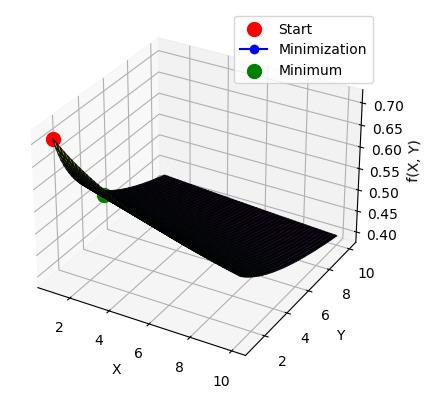

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def funkcja(x, y):
    return (x + 3*y)**(-1/4)

def gradient_descent(learning_rate, iterations):
    x = np.random.uniform(1, 10)
    y = np.random.uniform(1, 10)

    history = []

    for _ in range(iterations):
        df_dx = (funkcja(x + 1e-6, y) - funkcja(x, y)) / 1e-6
        df_dy = (funkcja(x, y + 1e-6) - funkcja(x, y)) / 1e-6

        x = x - learning_rate * df_dx
        y = y - learning_rate * df_dy
        history.append([x, y, funkcja(x, y)])

    return np.array(history)

x_vals = np.linspace(1, 10, 100)
y_vals = np.linspace(1, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funkcja(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='k')

ax.scatter(1, 1, funkcja(1, 1), color='red', marker='o', s=100, label='Start')

learning_rate = 0.01
iterations = 100
history = gradient_descent(learning_rate, iterations)

ax.plot(history[:, 0], history[:, 1], history[:, 2], color='blue', marker='o', label='Minimization')

ax.scatter(history[-1, 0], history[-1, 1], history[-1, 2], color='green', marker='o', s=100, label='Minimum')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.legend()

plt.show()